## Hypothesis : The features that are good predictors of popularity are year, valence, and energy

### By: Daniel Leskiewicz, Vaughn Neidert, Tyler Tran

## Data Set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv('data_big.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [5]:
df = df.drop('artists', 1)
df = df.drop('id', 1)
df = df.drop('name', 1)
df = df.drop('release_date', 1)
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   duration_ms       169909 non-null  int64  
 3   energy            169909 non-null  float64
 4   explicit          169909 non-null  int64  
 5   instrumentalness  169909 non-null  float64
 6   key               169909 non-null  int64  
 7   liveness          169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   mode              169909 non-null  int64  
 10  popularity        169909 non-null  int64  
 11  speechiness       169909 non-null  float64
 12  tempo             169909 non-null  float64
 13  valence           169909 non-null  float64
 14  year              169909 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 19.4 MB


## Data Analysis and Visualization

In [7]:
categorical_variables = ['key', 'mode','explicit']
numerical_variables = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'year']
all_variables = categorical_variables + numerical_variables

Key: We can see that a variety of keys are being used and some more than others which can give us a good insight on if a specific key is the determining factor to the songs popularity.

Explicit: Within this plot we can see the total count of songs that are explicit and not explicit. There is a big gap between explicit and non explicit songs so it is interesting that explicit songs do better on average than non explicit songs

Mode: Within this plot we can see that there are more songs using major than minors.


Range: 0-11


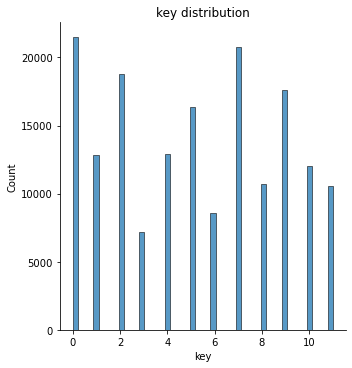

Range: 0-1


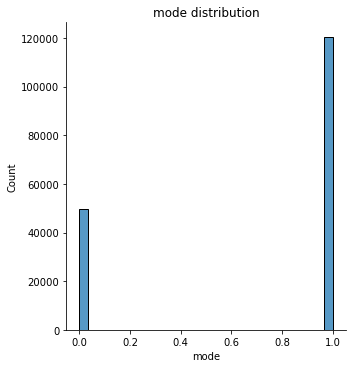

Range: 0-1


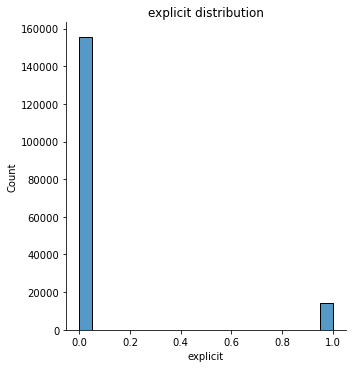

Range: 0.0-0.996


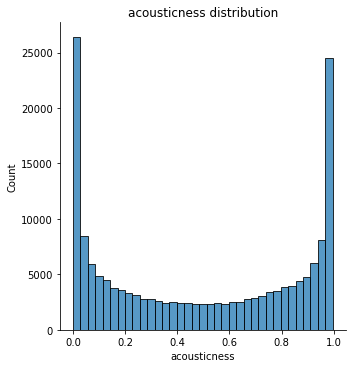

Range: 0.0-0.988


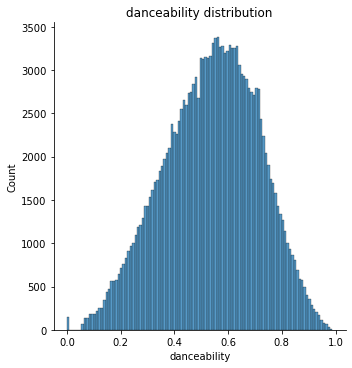

Range: 5108-5403500


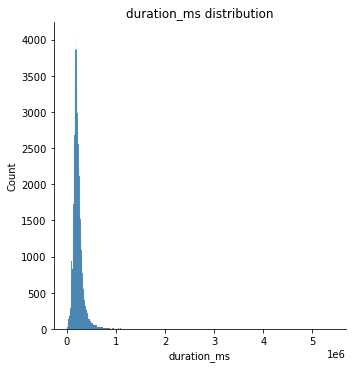

Range: 0.0-1.0


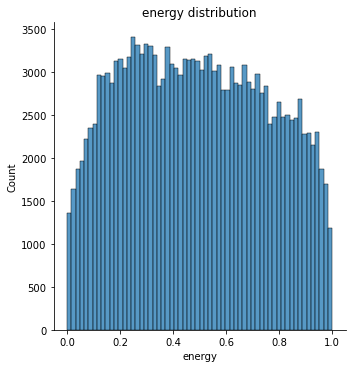

Range: 0.0-1.0


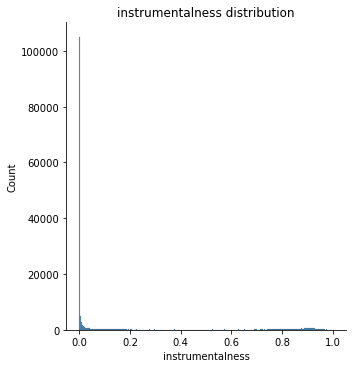

Range: 0.0-1.0


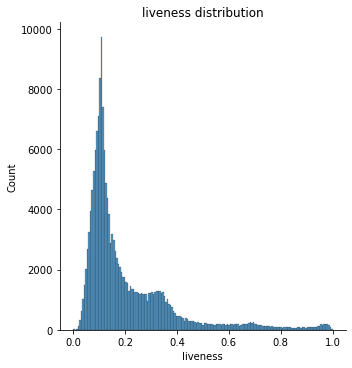

Range: -60.0-3.855


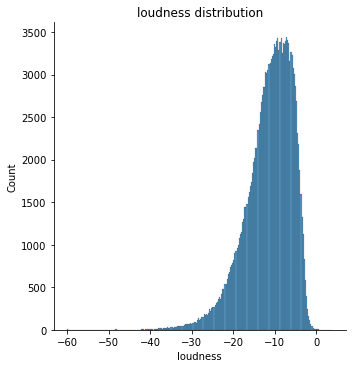

Range: 0.0-244.091


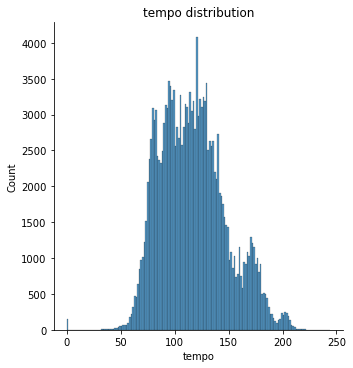

Range: 0.0-1.0


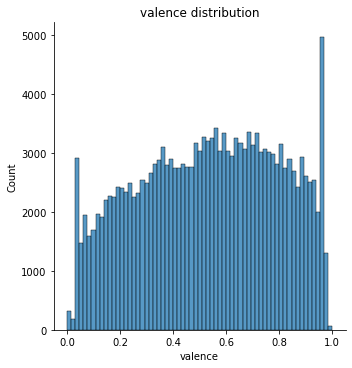

Range: 1921-2020


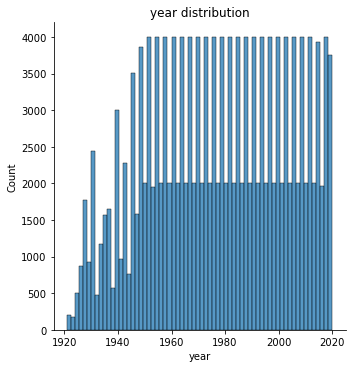

In [7]:
for column in all_variables:
    sns.displot(x=df[column])
    plt.title(column + " distribution")
    print("Range: " + str(df[column].min()) + '-' + str(df[column].max()))
    plt.show()

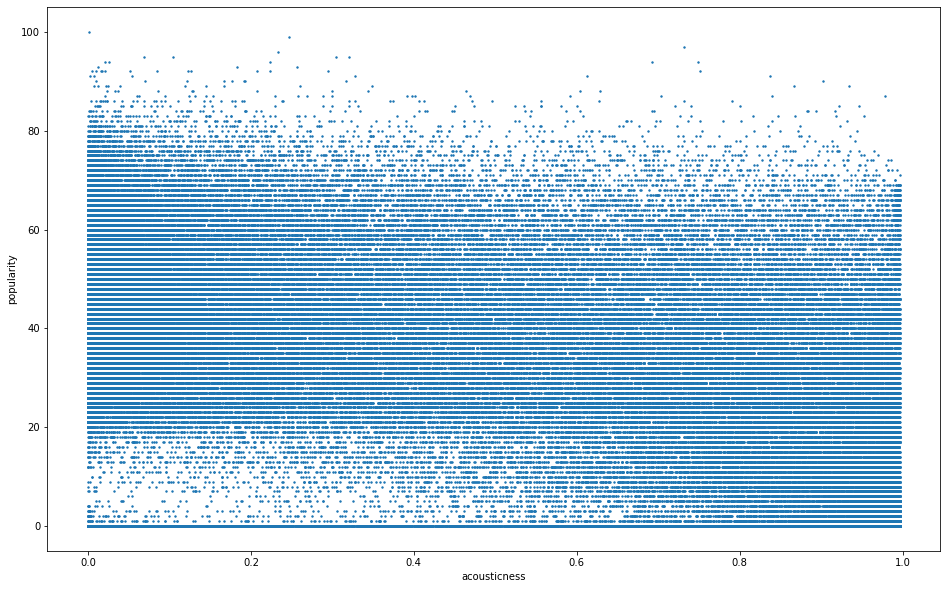

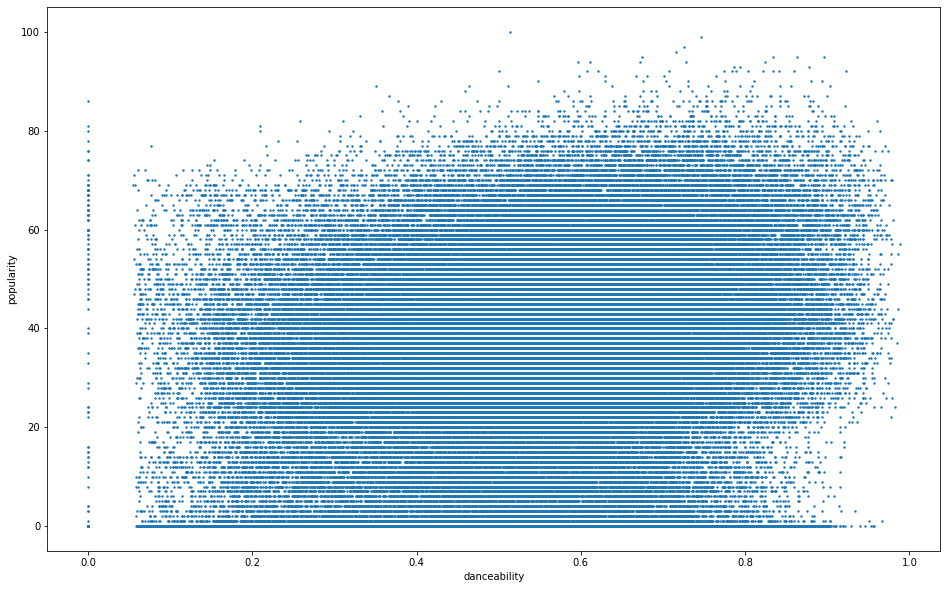

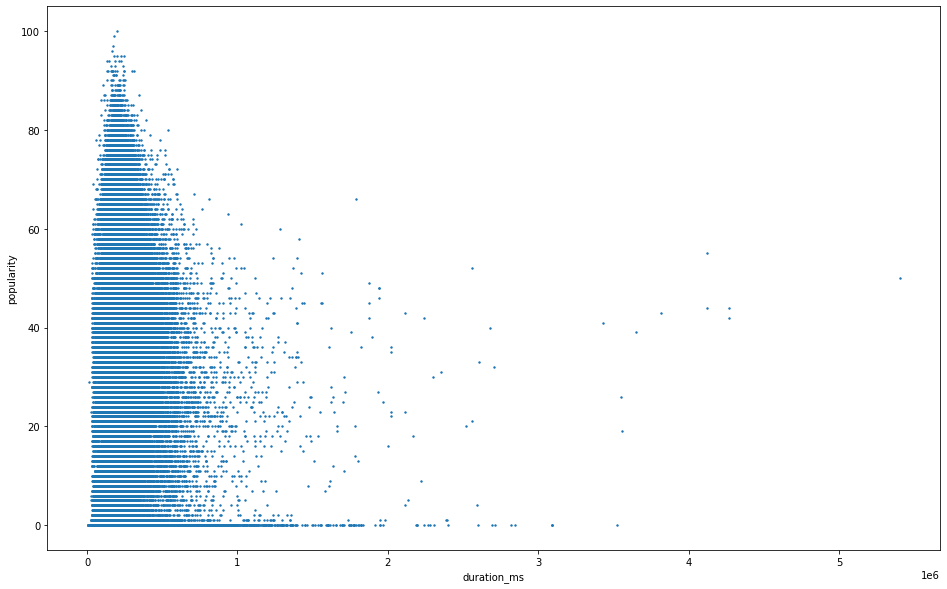

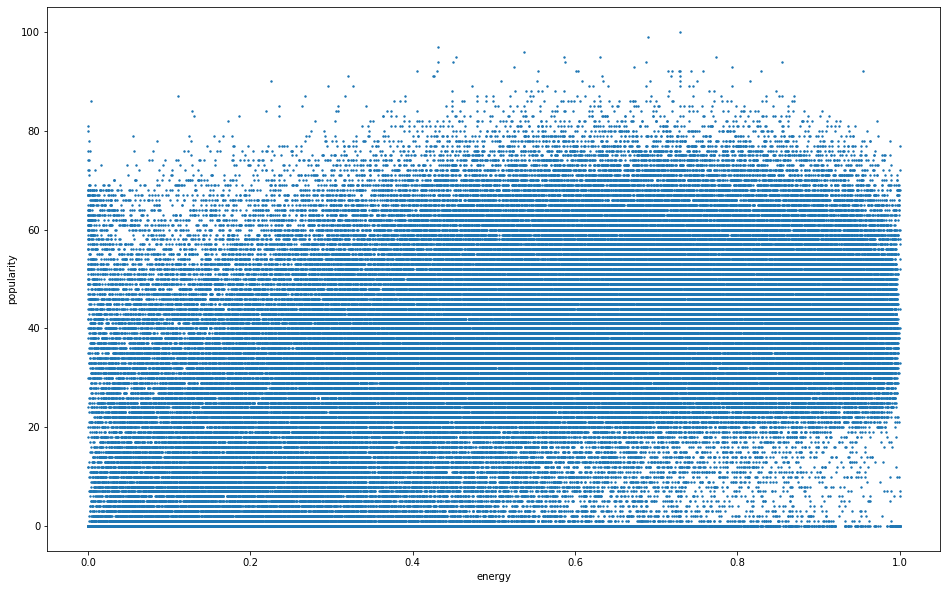

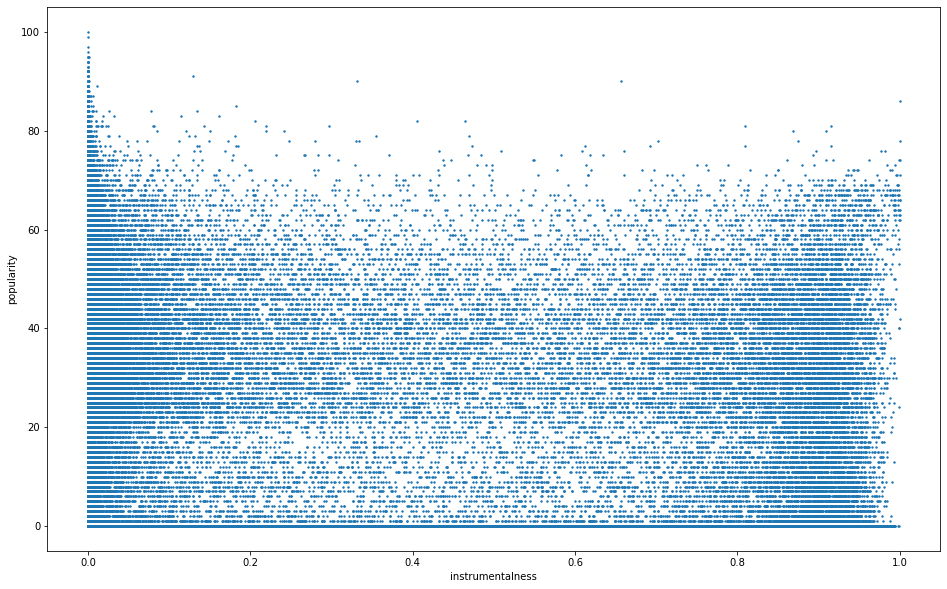

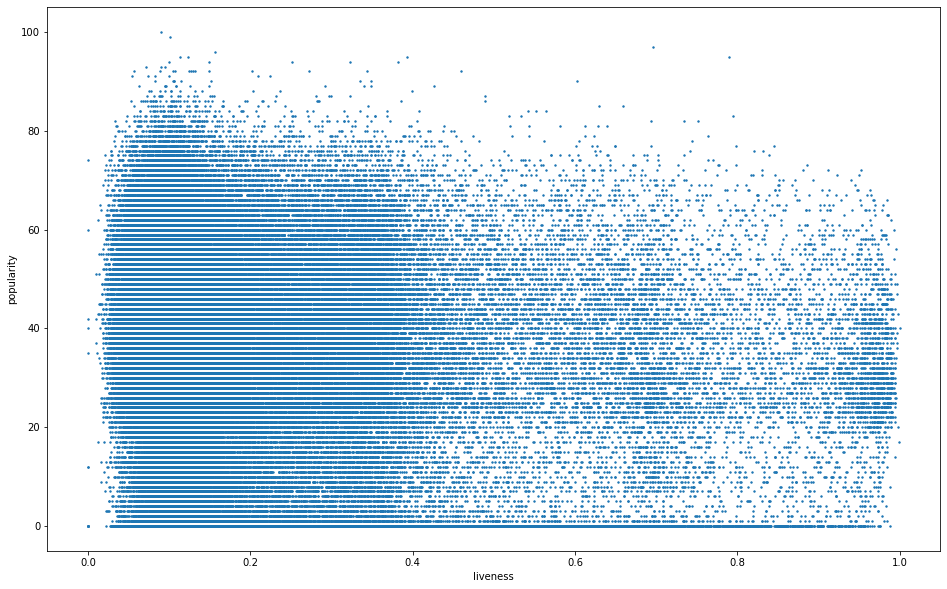

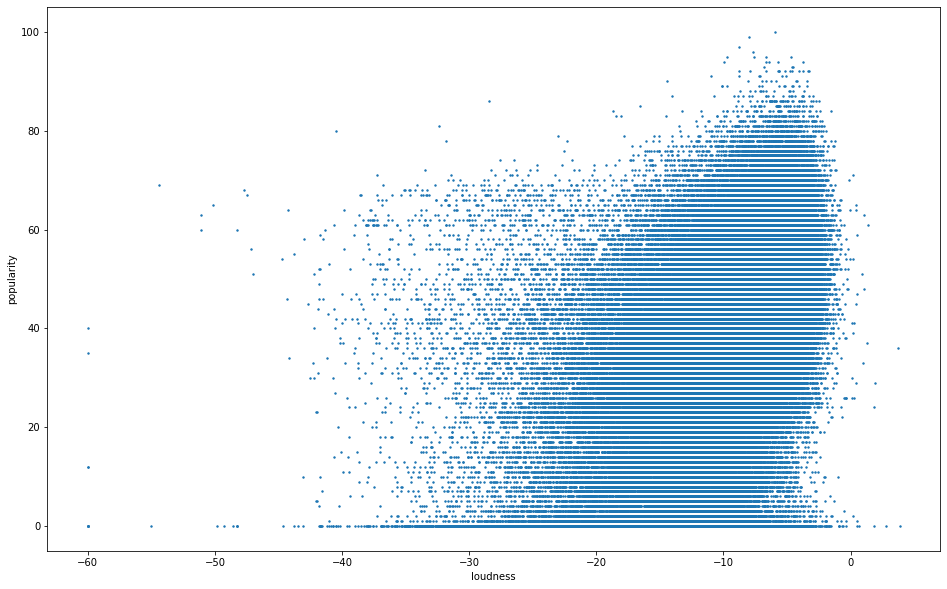

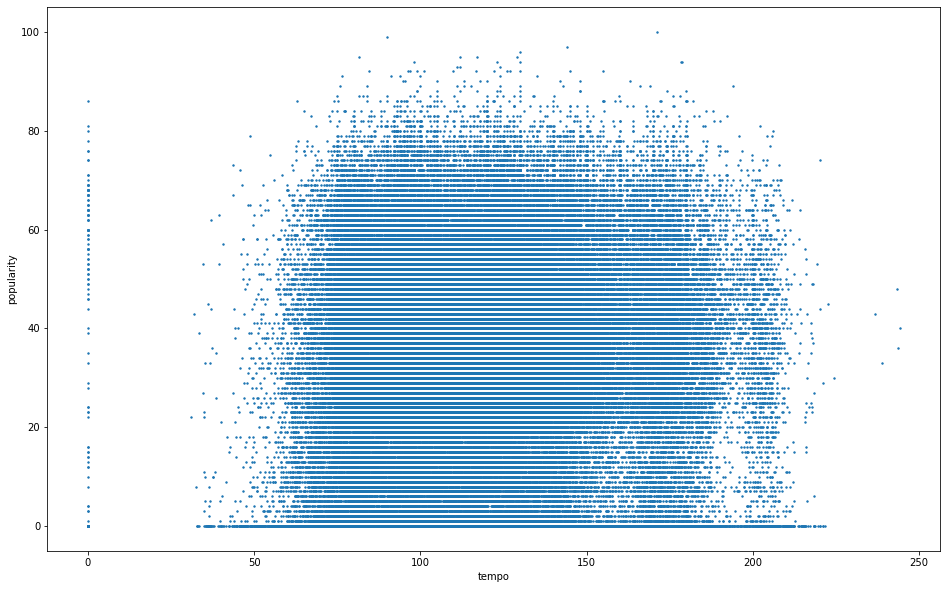

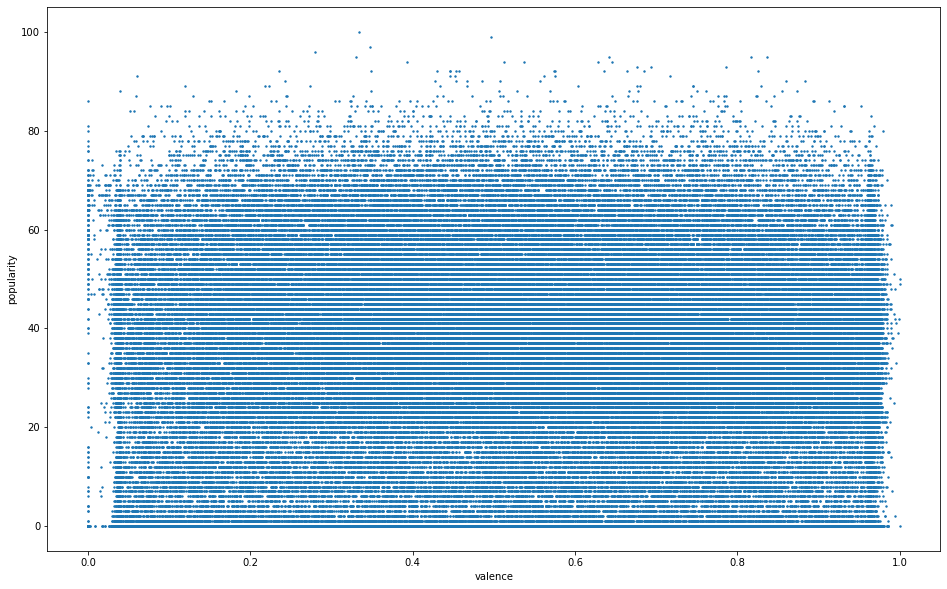

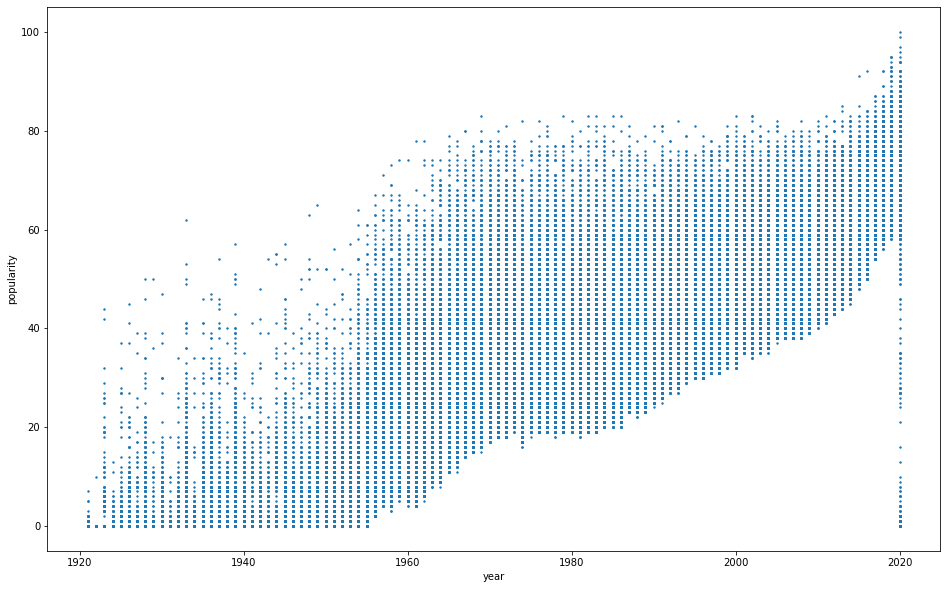

In [8]:
for column in numerical_variables:
    df.plot.scatter(x=column, y='popularity', s=2)
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.show()

Key vs Popularity: This boxplot represents the popularity between all of the keys on the octave. We can see that the difference in the type of key used are not really significant to the popularity of a given song. 

Mode vs Popularity: This boxplot represents the popularity vs the mode which is either the minor or major used within the song. We can see that either mode is used and the popularity appears to be relatively the same. There is no significance between mode and popularity to show any sort of correlation. 

Explicit vs popularity: This boxplot represents the popularity vs the explicit content within a song. From the distribution within the plot we can say that explicit songs are on average more likely to be popular than non explicit songs. 


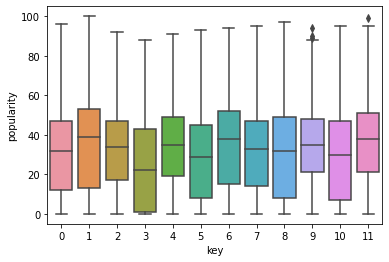

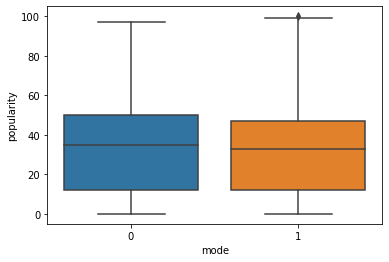

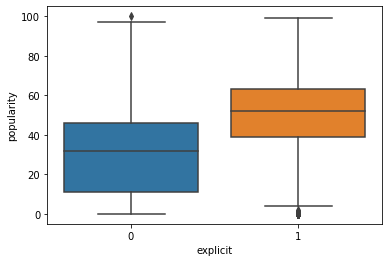

In [9]:
for column in ['key', 'mode', 'explicit']:
    sns.boxplot(x=df[column], y=df['popularity'])
    plt.show()

# Data Modeling and Prediction

## Linear Regression

#### Scaling the Data

In [10]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.998996,0.716599,0.028442,0.1950,0.0,0.563,0.909091,0.1510,0.745000,1.0,0.00,0.052219,0.485348,0.7790,0.070707
1,0.997992,0.383603,0.051316,0.0135,0.0,0.901,0.727273,0.0763,0.494026,1.0,0.00,0.047678,0.344019,0.0767,0.070707
2,0.606426,0.758097,0.018374,0.2200,0.0,0.000,0.454545,0.1190,0.627609,0.0,0.00,0.958720,0.439086,0.8800,0.070707
3,0.998996,0.790486,0.032538,0.1300,0.0,0.887,0.090909,0.1110,0.708887,0.0,0.00,0.095562,0.442470,0.7200,0.070707
4,0.993976,0.212551,0.126450,0.2040,0.0,0.908,1.000000,0.0980,0.676079,1.0,0.01,0.043756,0.254614,0.0693,0.070707


#### Splitting the Data

In [11]:
df_train, df_test = train_test_split(df_scaled)

### Baseline Model

In [12]:
X_train = df_train[["energy"]].values
X_test = df_test[["energy"]].values
y_train = df_train["popularity"].values
y_test = df_test["popularity"].values

In [13]:
zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

base_lr = SGDRegressor(max_iter=5000)
base_lr.fit(zeros_train, y_train)

SGDRegressor(max_iter=5000)

In [14]:
pred_pop_base_test = base_lr.predict(zeros_test)

In [15]:
base_mse = mean_squared_error(y_test, pred_pop_base_test)
base_rmse = np.sqrt(base_mse)

print("Base Model MSE:", base_mse)
print("Base Model RMSE:", base_rmse)

Base Model MSE: 0.04644642515340626
Base Model RMSE: 0.21551432702585288


Text(0, 0.5, 'Predicted Popularity')

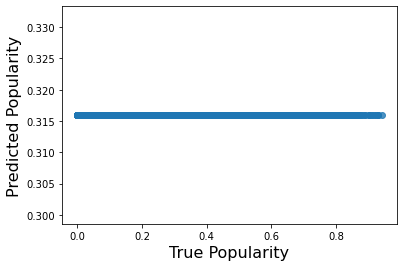

In [16]:
sns.regplot(x=y_test, y=pred_pop_base_test, fit_reg=False)
plt.xlabel("True Popularity", fontsize=16)
plt.ylabel("Predicted Popularity", fontsize=16)
plt.show()

### Greedy Algorithm

In [17]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns=None):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    if dummy_columns is None:
        dummy_columns = dict()
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = SimpleImputer(missing_values=0)
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

In [21]:
def select_features(df_train, df_test, y_train, y_test, sorted_columns, dummy_columns=None):
    lr = SGDRegressor(max_iter=5000)
    
    train_zeros = np.zeros((y_train.shape[0], 1))
    test_zeros = np.zeros((y_test.shape[0], 1))
    lr.fit(train_zeros, y_train)
    pred_y_test = lr.predict(test_zeros)
    
    null_mse = mean_squared_error(y_test, pred_y_test)
    null_rmse = np.sqrt(null_mse)
    
    base_model_columns = []
    base_rmse = null_rmse
    base_mse = null_mse

    print("Base Model MSE:", base_mse)
    print("Base Model RMSE:", base_rmse)
    print()

    for col_name in sorted_columns:
        # track all column names
        trial_columns = base_model_columns[:]
        trial_columns.append(col_name)

        X_train, X_test = create_feature_matrices(df_train,
                                                  df_test,
                                                  trial_columns,
                                                  dummy_columns=dummy_columns)
    
        lr = SGDRegressor(max_iter=5000)
        lr.fit(X_train, y_train)
        pred_y_test = lr.predict(X_test)
        trial_mse = mean_squared_error(y_test, pred_y_test)
        trial_rmse = np.sqrt(trial_mse)
        print()
        print(str(trial_columns) + " Model MSE:", trial_mse)
        print(str(trial_columns) + " Model RMSE:", trial_rmse)
    
        if trial_rmse < base_rmse:
            print("Updating base model")
            base_rmse = trial_rmse
            base_mse = trial_mse
            base_model_columns = trial_columns
        
        print()
        print("Base Model MSE:", base_mse)
        print("Base Model RMSE:", base_rmse)
        print()
    
    print("Our chosen columns are: " + str(base_model_columns))
    return base_model_columns

In [22]:
def sort_columns(df_train, df_test, y_train, y_test, all_columns):
    column_rmses = []

    for col_name in all_columns:
        X_train, X_test = create_feature_matrices(df_train,
                                                 df_test,
                                                 [col_name])
    
        simple_lr = SGDRegressor(max_iter=5000)
        simple_lr.fit(X_train, y_train)
        pred_prices_simple_test = simple_lr.predict(X_test)
        simple_mse = mean_squared_error(y_test, pred_prices_simple_test)
        simple_rmse = np.sqrt(simple_mse)
        print()
        print(col_name + " Model MSE:", simple_mse)
        print(col_name + " Model RMSE:", simple_rmse)
        column_rmses.append((simple_rmse, col_name))
    
    column_rmses.sort(key=lambda p: p[0])
    sorted_columns = [col_name for _, col_name in column_rmses]
    print()
    print("Sorted columns:" + str(sorted_columns))
    
    return sorted_columns

In [23]:
sorted_columns = sort_columns(df_train, df_test, y_train, y_test, all_variables)


key Model MSE: 0.046492028759529375
key Model RMSE: 0.21562010286503755

mode Model MSE: 0.046446535528848275
mode Model RMSE: 0.215514583100189

explicit Model MSE: 0.04644636331035244
explicit Model RMSE: 0.21551418354798008

acousticness Model MSE: 0.030453402450514085
acousticness Model RMSE: 0.1745090325757211

danceability Model MSE: 0.04437926544549592
danceability Model RMSE: 0.2106638683910839

duration_ms Model MSE: 0.04642221473765335
duration_ms Model RMSE: 0.2154581507802695

energy Model MSE: 0.03513740121429426
energy Model RMSE: 0.1874497298325454

instrumentalness Model MSE: 0.0436104994693013
instrumentalness Model RMSE: 0.20883127033397395

liveness Model MSE: 0.046188490099592236
liveness Model RMSE: 0.21491507648276384

loudness Model MSE: 0.03647815560584268
loudness Model RMSE: 0.1909925537968501

tempo Model MSE: 0.045654597874865435
tempo Model RMSE: 0.21366936578476906

valence Model MSE: 0.04645557959652274
valence Model RMSE: 0.21553556457467232

year Model

In [24]:
selected_columns = select_features(df_train, df_test, y_train, y_test, sorted_columns)

Base Model MSE: 0.0464573143696634
Base Model RMSE: 0.2155395888686424


['year'] Model MSE: 0.010547269370303326
['year'] Model RMSE: 0.10269989956325822
Updating base model

Base Model MSE: 0.010547269370303326
Base Model RMSE: 0.10269989956325822


['year', 'acousticness'] Model MSE: 0.010411609028134847
['year', 'acousticness'] Model RMSE: 0.1020372923402755
Updating base model

Base Model MSE: 0.010411609028134847
Base Model RMSE: 0.1020372923402755


['year', 'acousticness', 'energy'] Model MSE: 0.01041123818402993
['year', 'acousticness', 'energy'] Model RMSE: 0.10203547512522265
Updating base model

Base Model MSE: 0.01041123818402993
Base Model RMSE: 0.10203547512522265


['year', 'acousticness', 'energy', 'loudness'] Model MSE: 0.010376843814103535
['year', 'acousticness', 'energy', 'loudness'] Model RMSE: 0.10186679446268807
Updating base model

Base Model MSE: 0.010376843814103535
Base Model RMSE: 0.10186679446268807


['year', 'acousticness', 'energy', 'loudness', 'instrum

In [25]:
X_train, X_test = create_feature_matrices(df_train, df_test, selected_columns)

lr = SGDRegressor(max_iter=5000)
lr.fit(X_train, y_train)
pred_pop_test = lr.predict(X_test)

mse = mean_squared_error(y_test, pred_pop_test)
rmse = np.sqrt(mse)
print("Model MSE:", mse)
print("Model RMSE:", rmse)

Model MSE: 0.010282124040994257
Model RMSE: 0.10140080887741605


Text(0, 0.5, 'Predicted Popularity')

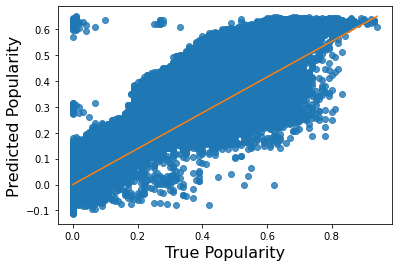

In [27]:
sns.regplot(x=y_test, y=pred_pop_test, fit_reg=False)
plt.plot([0, np.max(y_test)], [0, np.max(pred_pop_test)])
plt.xlabel("True Popularity", fontsize=16)
plt.ylabel("Predicted Popularity", fontsize=16)
plt.show()

### All Variables

In [28]:
X_train, X_test = create_feature_matrices(df_train, df_test, all_variables)

lr = SGDRegressor(max_iter=5000)
lr.fit(X_train, y_train)
pred_pop_test = lr.predict(X_test)

mse = mean_squared_error(y_test, pred_pop_test)
rmse = np.sqrt(mse)
print("Model MSE:", mse)
print("Model RMSE:", rmse)

Model MSE: 0.010292466780395637
Model RMSE: 0.10145179535323974


Text(0, 0.5, 'Predicted Popularity')

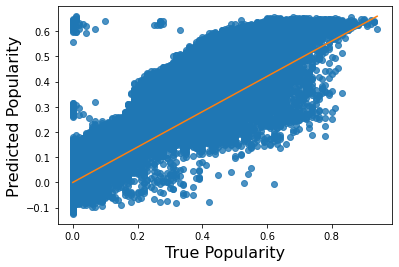

In [30]:
sns.regplot(x=y_test, y=pred_pop_test, fit_reg=False)
plt.plot([0, np.max(y_test)], [0, np.max(pred_pop_test)])
plt.xlabel("True Popularity", fontsize=16)
plt.ylabel("Predicted Popularity", fontsize=16)
plt.show()

## Statistical Testing

### Kruskal Wallis Test

Song numerical with Kruskal Wallis test: From running tests within the numerical features against popularity with the Kruskal Wallis test, we can see that some of the features have really good P Values such as danceability, and energy. There are also bad P Values such as loudness, tempo, valence, instrumentalness which get a P Value of 1.0 and show no significance with popularity. 

In [9]:
categorical_results = []
for i in categorical_variables:
    for value in set(df[i]):
        mask = df[i] == value
        categorical_results.append(df['popularity'][mask])
    value4, pValue = stats.kruskal(*categorical_results)
    print(i, pValue)

key 0.0
mode 0.0
explicit 0.0


|Variable|P-Value|Significance of P-Value with $\alpha$ = 0.05|
| --- | --- | --- |
|key|0.0|YES|
|mode|0.0|YES|
|explicit| 0.0|YES|

### Linear Regression

Using the numerical features we used linear regression to get the R values and the P values using the popularity and all of the other features. Using linear Regression and observing the P values, duration_ms, liveness, and valence had the best P Values under the specific significance threshold, while the other features had a value of 0.0 which is still under the threshold but not as good as the other features. 

In [32]:
for var in numerical_variables:
    slope, intercept, r, pvalue, stderr = stats.linregress(df['popularity'], df[var])

| Variable | P-Value | Significance at $\alpha$ = 0.01|
| --- | --- | --- |
|acousticness | 0.0 | Yes |
|danceability | 0.0 | Yes |
|duration_ms| 2.471038632012217e-150 | Yes |
|energy| 0.0 | Yes |
|instrumentalness| 0.0 | Yes |
|liveness| 4.546234925115416e-212| Yes |
|loudness| 0.0 | Yes |
|tempo| 0.0 | Yes |
|valence| 0.00012074135143241996 | Yes |
|year| 0.0 | Yes |

We also used R values (Pearson Coefficient ): We can see that most of these features are neutral while some of them are negative or positive. If the value is -1 this indicates a perfect negative linear relationship between variables, and a 1 indicates a perfect positive linear relationship between variables, and a 0 indicates no linear relationship between variables. 

| Variable | R Values | Good Fit
| --- | --- | --- |
|acousticness |-0.5933452001831016| Negative |
|danceability | 0.221076890391612 | Positive Neutral |
|duration_ms| 0.06329177998309087 | Positive Neutral|
|energy| 0.49748833587696323 |Positive|
|instrumentalness|-0.29982923397827377 | Negative|
|liveness| -0.07529277078862263|Negative Neutral|
|loudness|0.466546008976029 |Positive|
|tempo| 0.13504699307240636 |Positive Neutral|
|valence| 0.00932692595139546|Positive Neutral|
|year| 0.880724164474985|Positive|

## Results Analysis

Overall, when working with the categories of Key, Mode, and Explicit of songs and comparing them to popularity we saw that explicit songs are way more likely to be popular than non explicit songs. Meanwhile, for mean and key there is no statistical difference when plotted to say that these values can predict a song's popularity. 

Furthermore, working with a  Linear Regression model we used a baseline model, greedy model, and an all variable model. To start, with the baseline model we use the average popularity number and we see how it performs with just that one average value. Based on the MSE and RMSE values these values are very low for a baseline model which indicates that either there were some computational errors or that when taking the average popularity and using a vector filled with zeros that it can get a good error result. This is only a baseline and these numbers can just be obtained by chance so we are not looking at the result of the baseline model. Transitioning to the greedy algorithm, the greedy algorithm picked these columns as best predictors: year, acousticness, energy, loudness, instrumentalness, danceability, tempo, liveness. These features give us good MSE and RMSE values compared to the baseline model. Lastly, we used a model with all of the numerical features within the dataset and saw that the error, MSE and RMSE is lower than the greedy model approach so using all numerical variables does give a better result using the Linear Regression model. 


Transitioning to the statistical tests, we utilized the kruskal wallis test with all of our categorical variables against popularity. Based on our p values, they are not confidence inspiring because they end up equaling zero and they are under the specific threshold for our “significance P Value threshold ” event though explicitly should have some statistical difference with popularity. In this case we value the visualization interpretation of these categorical variables against popularity to be more valuable than the results from the kruskal wallis test. Moving onto Linear Regression, we noticed that the features: duration_ms, liveness, and valence had the most obvious difference based on their p values but all of the other features reported as zero so we consider them as significant. Lastly, we also used the R values (Pearson Coefficients) to determine their relationship to popularity. Most of our results were neutral meaning closer to 0 than -1 or 1. So we can say that most of these features don’t have any sort of correlation to popularity. 
